# VISUALISING LINEAR RELATIONSHIPS ACROSS DATASETS

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_data = pd.read_csv('datasets/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')


Sometimes, when working with bivariate plots, it is not clear as to how exactly one variable varies with respect to another. Thus, it becomes easier to study the variation in one variable with respect to another independent variable. In statistics, this is called the regression plot.

Let us first look at the lmplot() function, a function in seaborn used to visualize a linear relationship as determined through regression. Maybe this will give us more clarity about our wine samples.

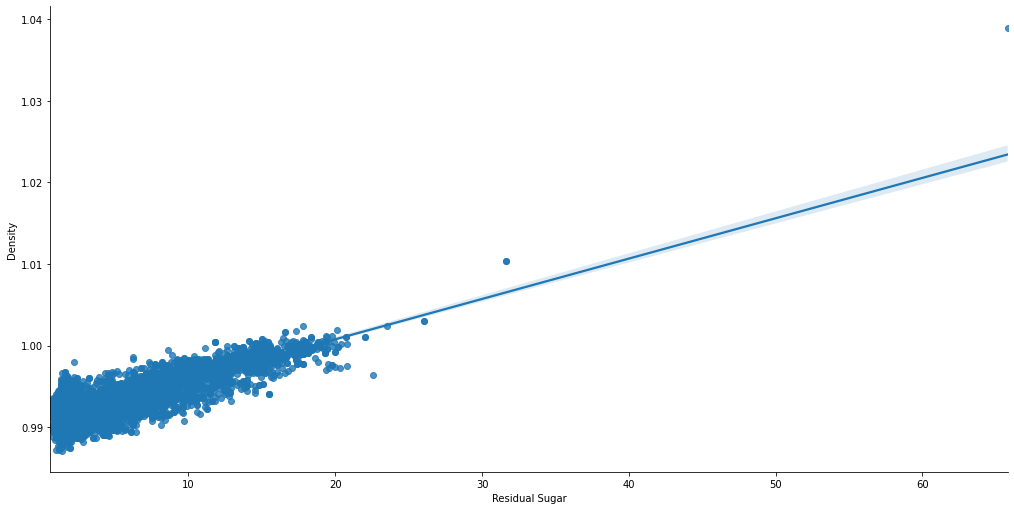

In [3]:
#---<---linear model
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, size=7, aspect=2)

From the regression plot, the residual sugar content seems to have a somewhat direct relationship with the density of the wine sample.

From the plot, we observe that:
* The lmplot draws a scatter plot of the input variables
* The functions fit the regression model y~x
* The regression line is plotted
  #### There is 95% **confidence interval** for the regression that can be observed as a shaded region around the regression line

### A confidence interval (LEFT DOWN NEAR .99 ) 
* gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data. 

### CATEGORIAL:
* the categorical variable is a discrete values
* Let us try to understand the relationship between the alcohol content and the quality of the wine.

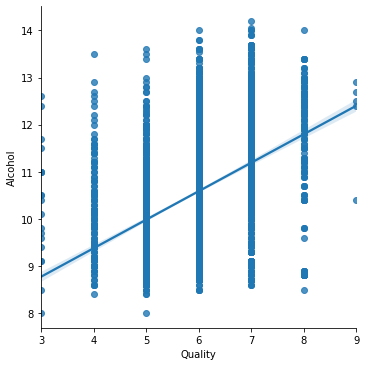

In [4]:
sns.lmplot(x='Quality', y='Alcohol', data=wine_data)

* As Quality takes only certain fixed values, we see that the scatter plot is more like a set of lines rather than a set of points that guides the regression line.
<br/>
**Hard to see the individual data points for each quality score**

#### For a better estimate, we could do one of the below
* add some **jitter** to the points (the regression line fit is not affected by this) 
* Consider a statistical analysis of the points, and replace the plot by its central tendency, along with permissible margins

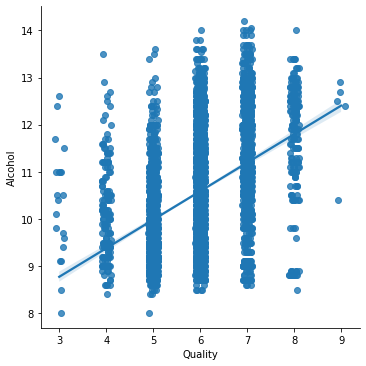

In [5]:
#Adding jitter to the scatter plots
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_jitter=.1) #<--------jitter

You can see that the added jitter has taken effect in the form of shifting the points a little along the x-axis.

#### Tip:

For the central tendency approach, **we need a statistical function that can estimate the mean value** of the given set of values. This can be obtained from Numpy library, which is a Python scientific computing package that adds support for large multi dimensional arrays and matrices.


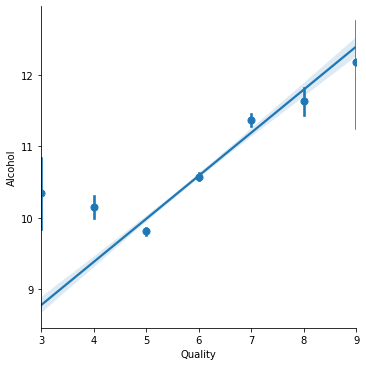

In [6]:
#importing numpy
import numpy as np

#Collapsing the data points in each bin and plotting the central tendency
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_estimator=np.mean) #<--------use of  x_estimator=np.mean

From the above graph, we know that there is a **good balance** of wine samples across various alcohol levels, with a quality of 6. 

## Fitting Different kinds of models


### What if we want to compare and contrast more than just two parameters?

* lmplot combines regplot() and Facetgrid(), 
* an object that links Pandas DataFrame to a matplotlib figure, 
* which makes it possible to visualise interactions with upto 3 additional categories. 
* The plots can be differentiated by colour/markers, additional rows and columns.<br>
*Lets use this to try and find the effect every component has on the pH level of the wine sample*

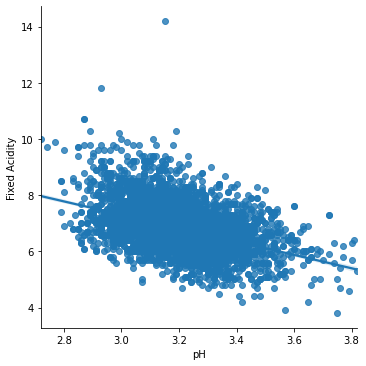

In [7]:
# We plot the relationship between Fixed Acidity content in the wine sample to its pH value
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data)

Let us create a column of graphs which varies by the quality of the wine sample. 

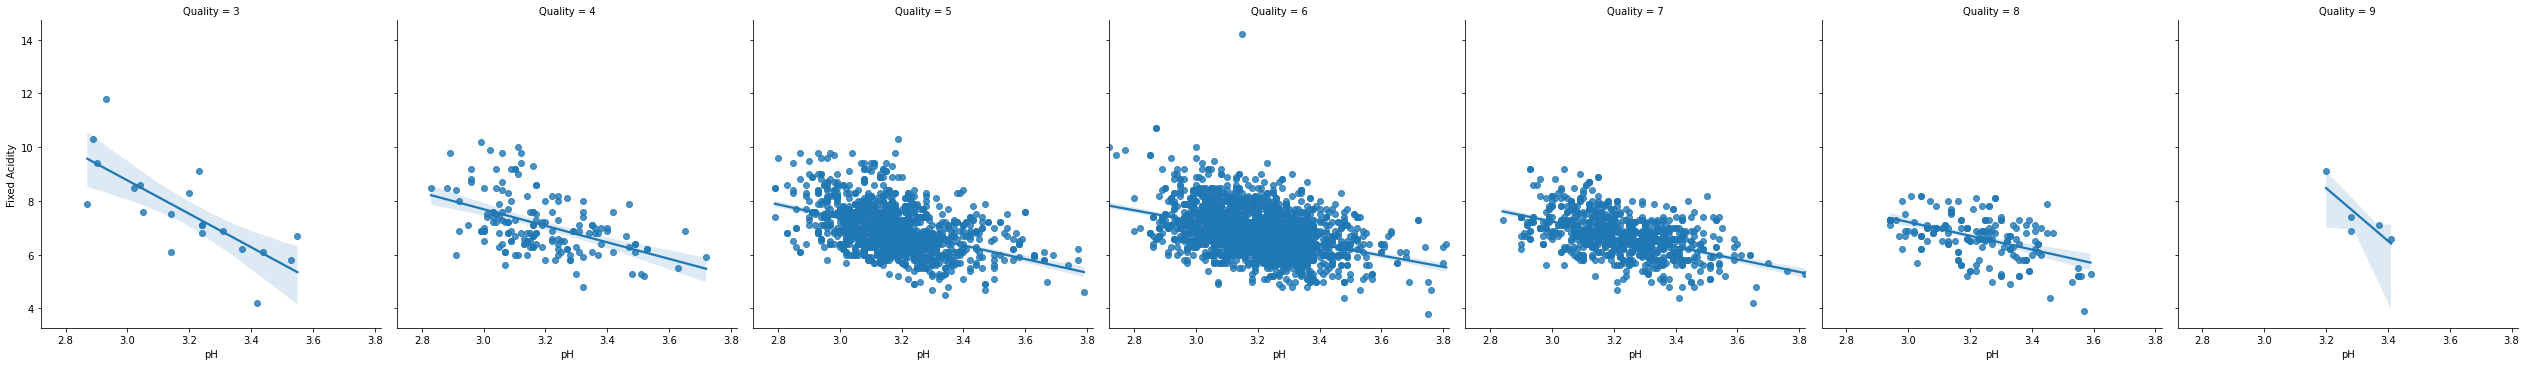

In [8]:
# We thus have as many columns as the number of different quality values. <-------i.e quality 3, 4, 5
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality")

We add colours to the plot based on the Alcohol content. 

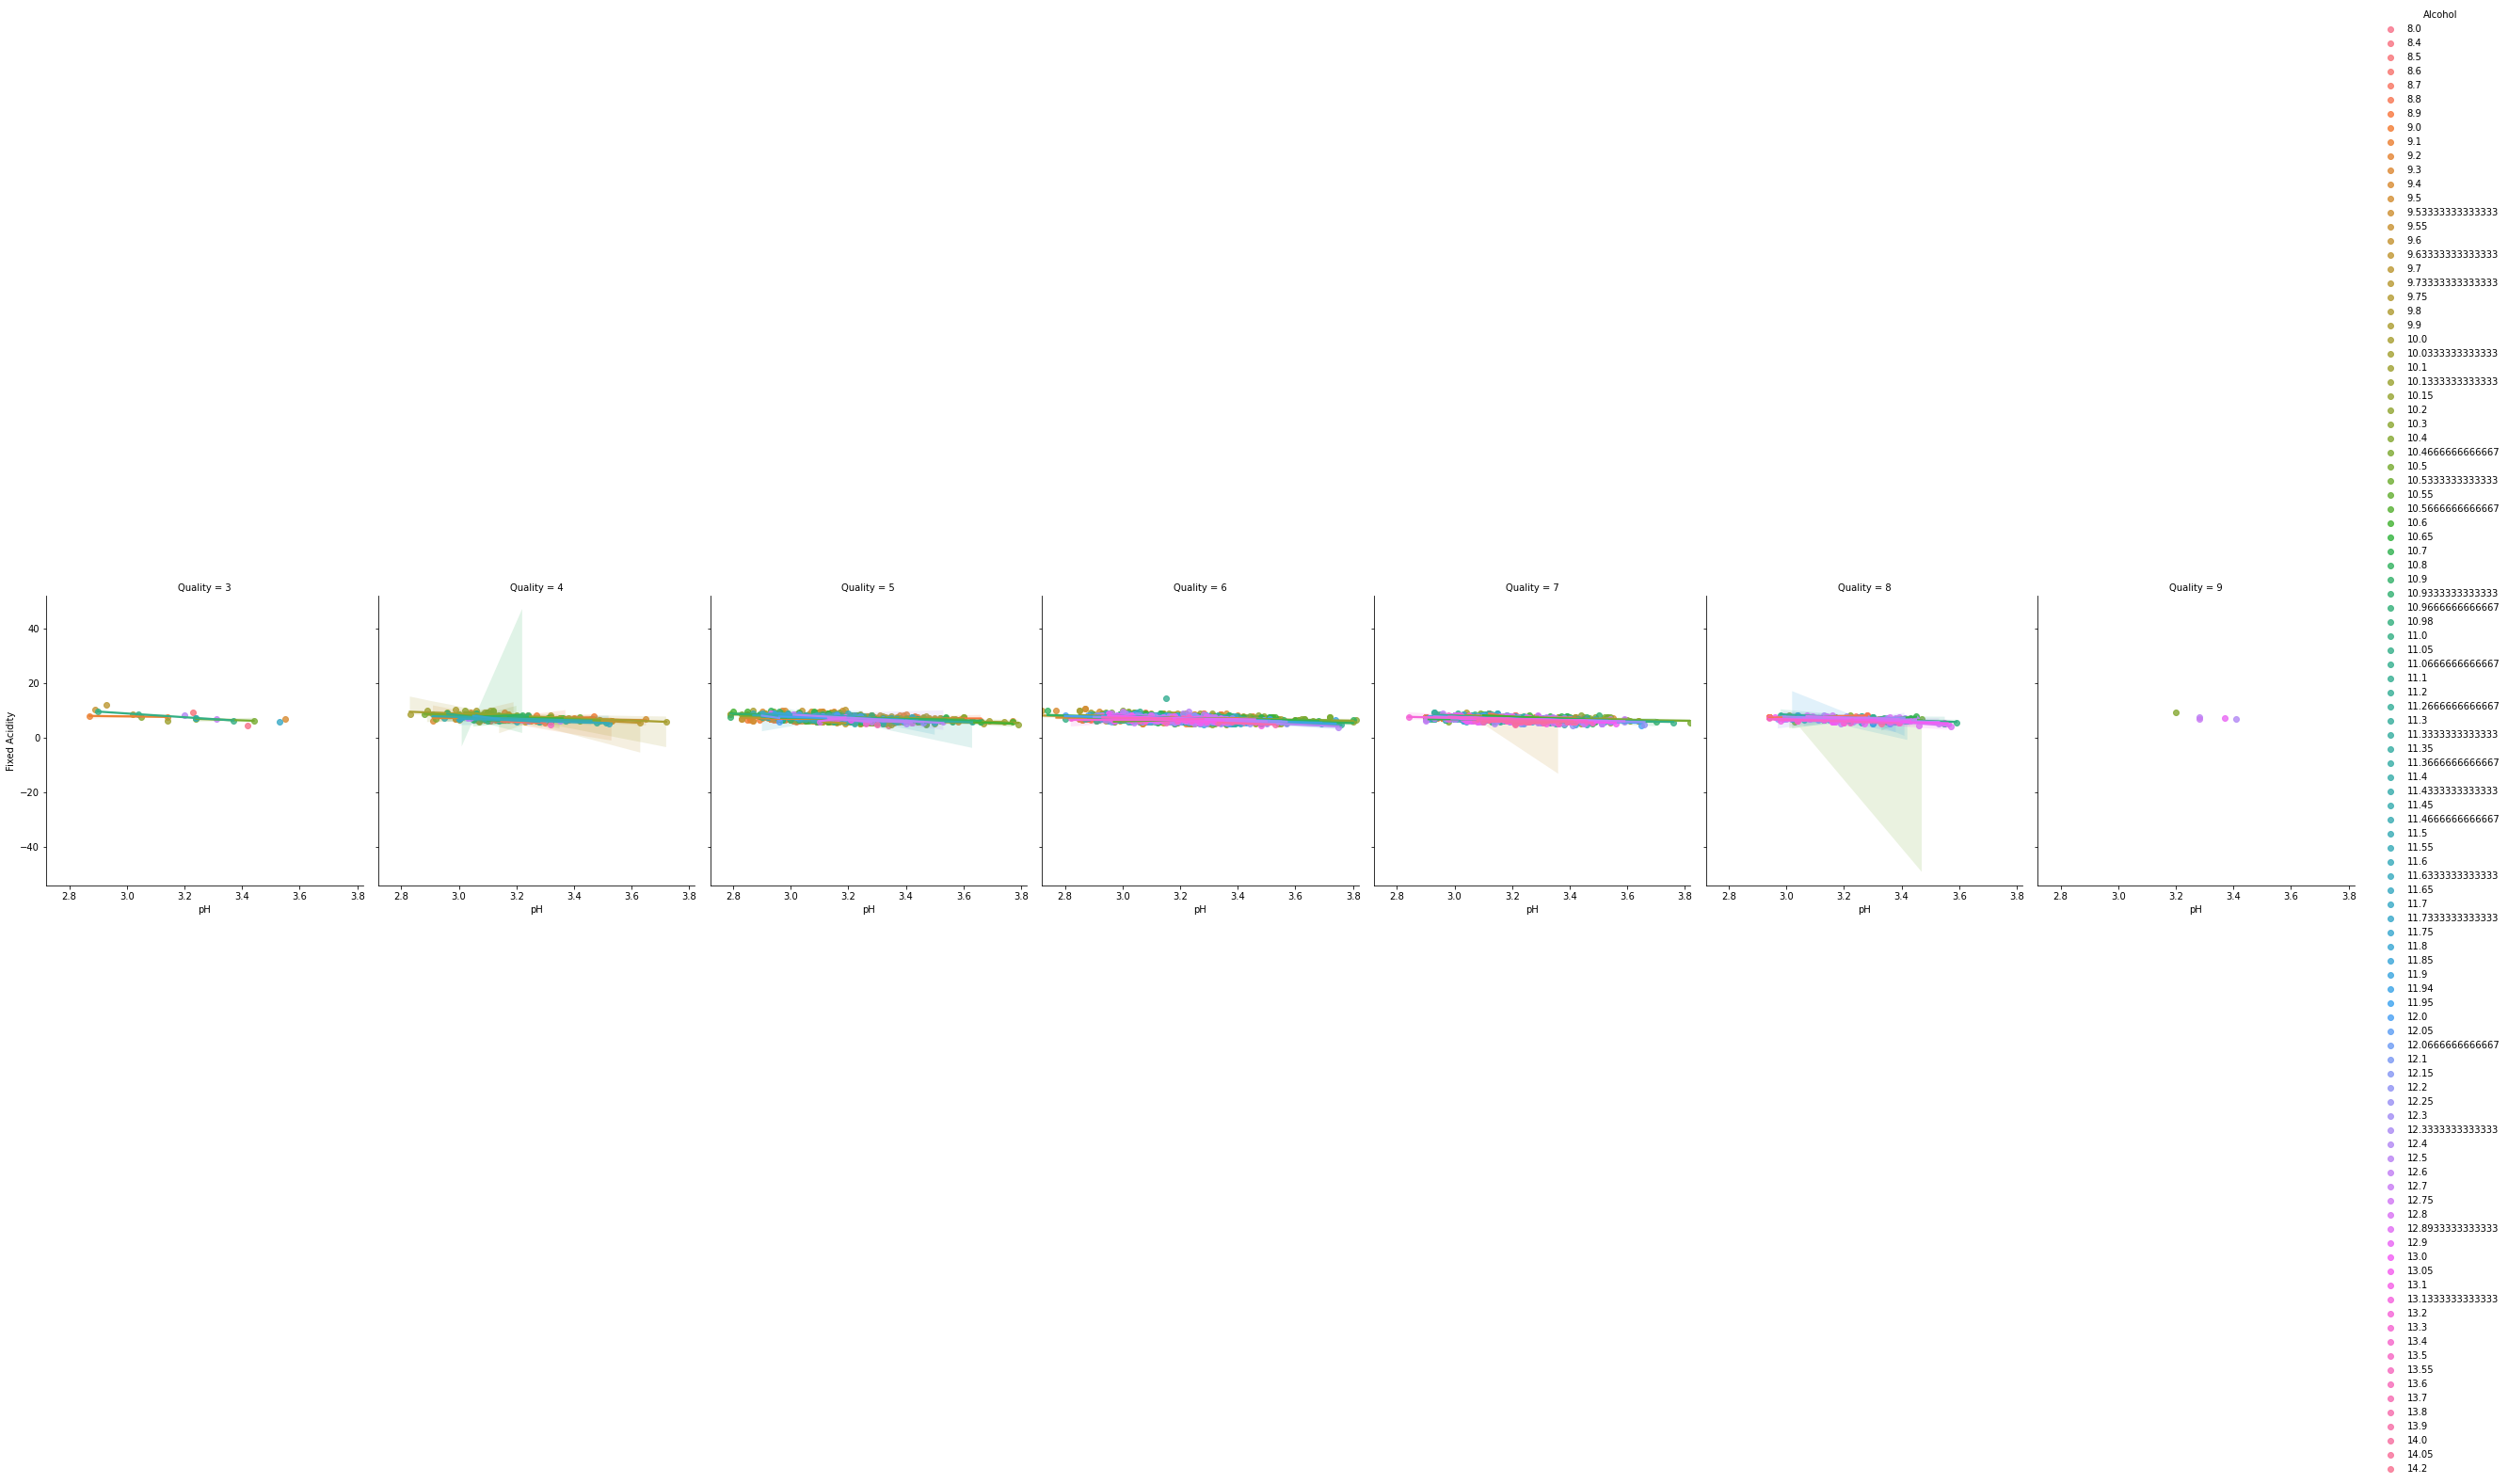

In [9]:
#Thus we get a set of shaded plots. 
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality", hue="Alcohol")#<-----use hue for adjusting the color

From the colors, we see that higher alcohol content samples dominate a quality of 9, while mid range dominates quality 4.

Let us add a row of wine density,

### Instead of adding a row attribute, let us **replace** the **col** attribute by the **row** attribute. 
Both can be used together to create a matrix of graphs


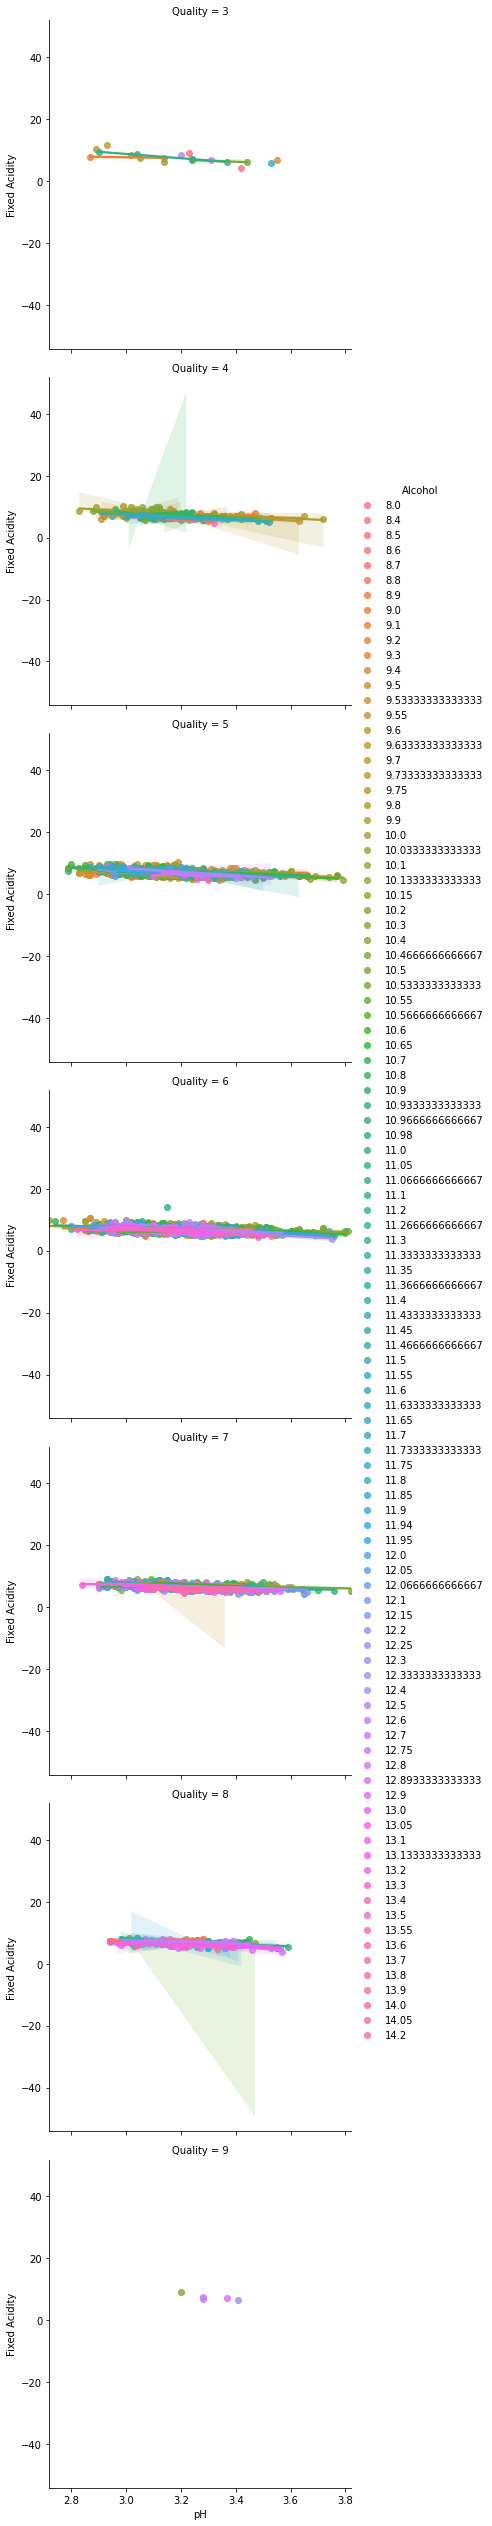

In [10]:
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, hue="Alcohol", row="Quality")

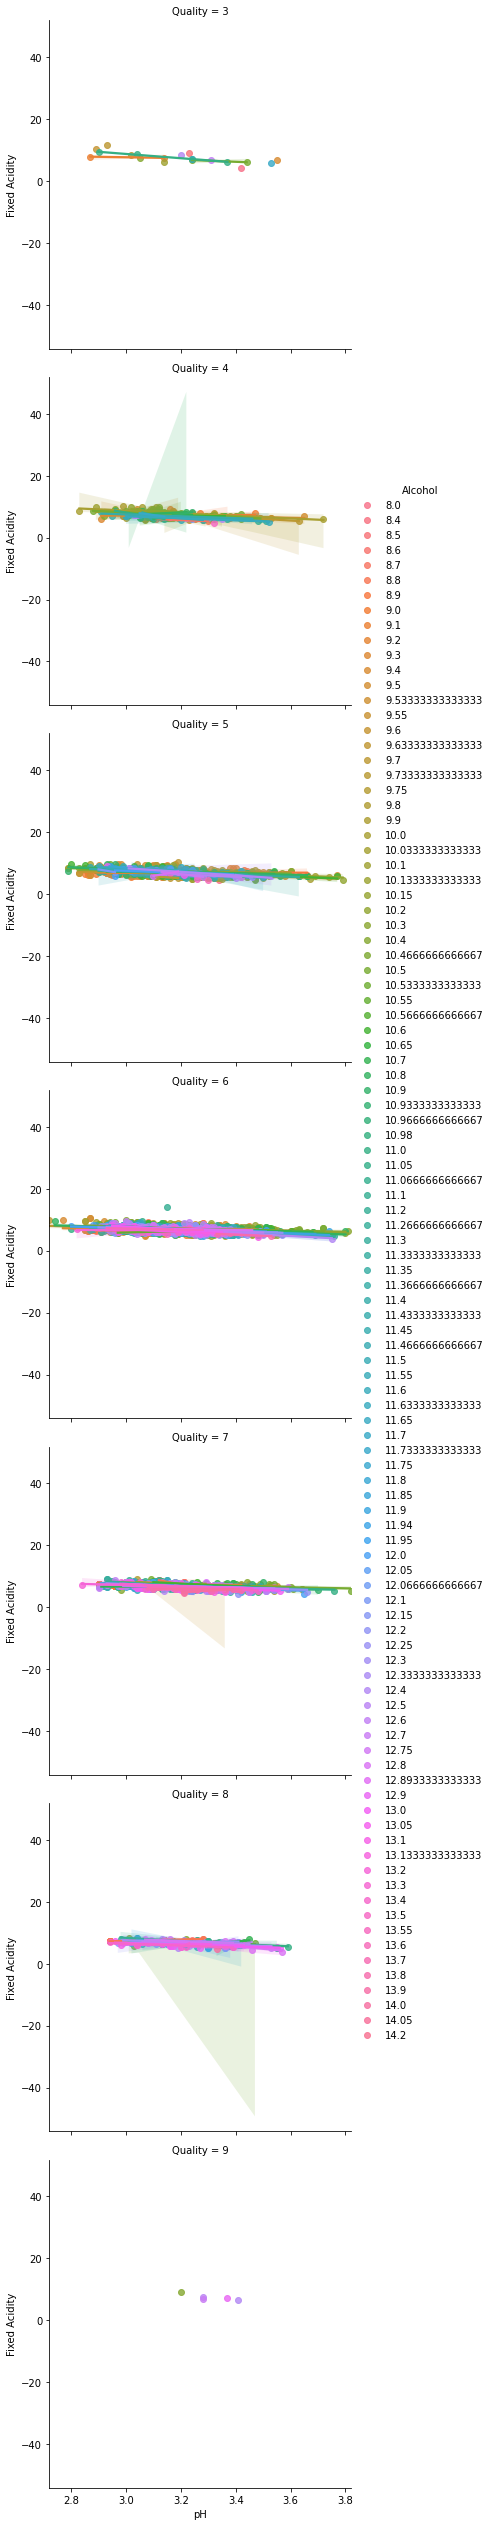

In [11]:
#Thus we get a set of shaded plots. 
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, row="Quality",hue="Alcohol")

### regplot() An alternative to lmplot()

#### Seaborn offers another function for plotting regression plots - called the regplot.

Let's plot one using the regplot() function

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

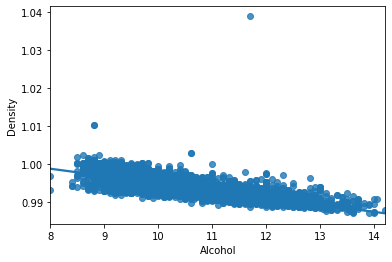

In [12]:
sns.regplot(x='Alcohol', y='Density', data=wine_data)


* regplot() accepts variables in different formats (numpy arrays, pandas series, dataframe variable references)
* lmplot() needs data as a parameter and strings x and y
* regplot has a subset of the features provided by lmplot()
* The other important difference is that lmplot allows you to compare more than just two variables, as we saw above.

#### Illustrating sending other data formats into the regplot. We expect the same plot as above

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

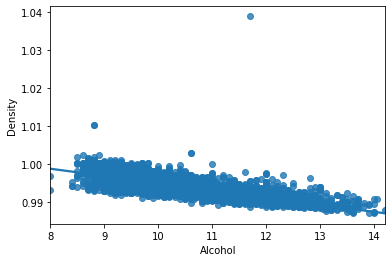

In [13]:
sns.regplot(x=wine_data['Alcohol'], y=wine_data['Density'], data=wine_data)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

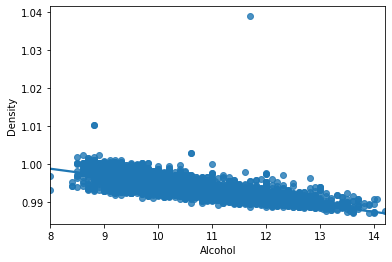

In [14]:
sns.regplot(wine_data.Alcohol, wine_data.Density, data=wine_data)

## Controlling the size and shape of the plot

#### For the reg plot,

<AxesSubplot:xlabel='Residual Sugar', ylabel='Density'>

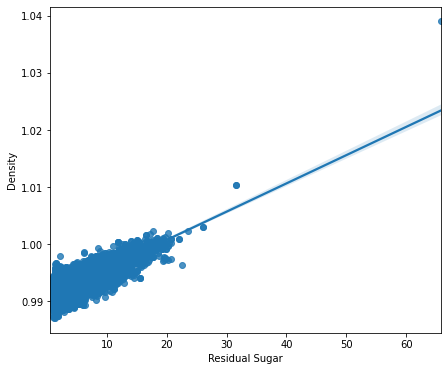

In [15]:
#We create a figure object to control the size. 
#The parameters inside the figsize denote the lengths of the box alloted for the plot
f, ax = plt.subplots(figsize=(7, 6))

#Pass the defined axis as the axis to be used for the regplot
sns.regplot(x='Residual Sugar', y='Density', data=wine_data, ax=ax) #<----ax = ax from matlibplot

#### For the lmplot
* We use the size and aspect parameters. 
* These apply to each facet in the plot, not the complete plotting area.
* size is the high
* width = aspect*size gives the width of each facet in inches

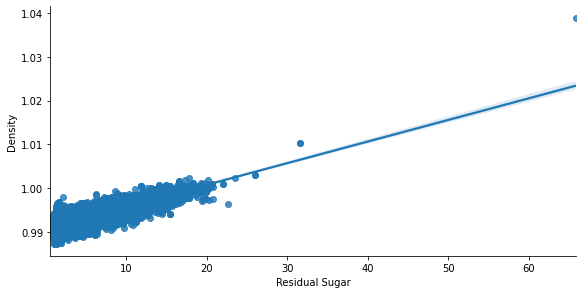

In [16]:
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, size=4, aspect=2);

### Can we use the regression plot to create interesting scenarios in our bivariate distributions?


**With the jointplot, we can use regplot to show the linear regression fit on the joint axes**

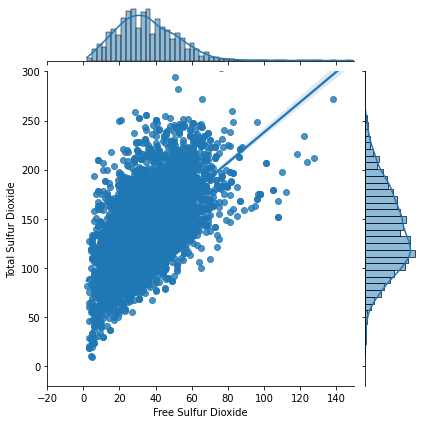

In [17]:
# We have simply added the kind=reg parameter to the jointplot we created earlier.
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              xlim={-20,150}, ylim={-20,300}, kind="reg")#<-----kind="reg"-----

With the pairplot, regplot can be used to show the linear relationship between variables in the dataset

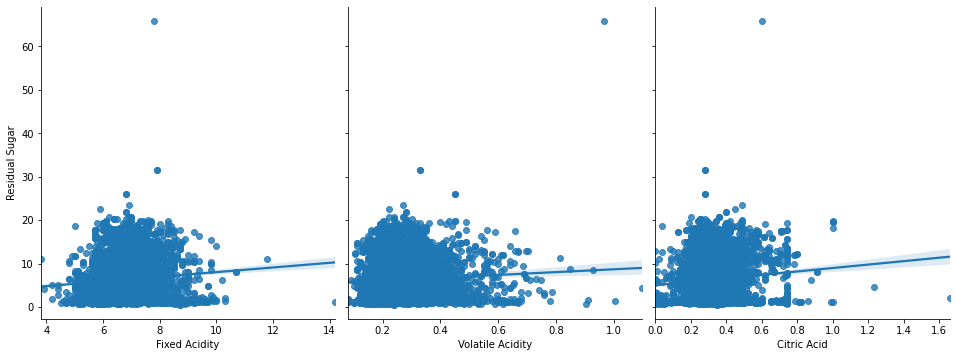

In [18]:
# We have used the pairplot we created earlier <---------
# but tweaked the x and y variables to get a more compact graph, 
#changed the size and aspect ratio, and added a kind parameter.
sns.pairplot(wine_data, 
             size=5, aspect=0.9, 
             x_vars=["Fixed Acidity","Volatile Acidity","Citric Acid"],#<--------------
             y_vars=["Residual Sugar"],
             kind="reg")  #<------------------

The graphs show he relation between Fixed acidity, volatile acidity and citric acid with residual sugar in the wine samples. 
*Observe that unlike the lmplot, this creates separate plots for each set of variables.*